In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install opencv-python
!pip install face_recognition
!pip install scikit-learn



In [ ]:
import os
import face_recognition
import cv2
import time
from sklearn import neighbors
import pickle
from google.colab.patches import cv2_imshow

# To Train the Students

In [ ]:

# Function to train face recognition model
def train_face_recognition_model(data_path):
    X = []
    y = []

    for class_folder in os.listdir(data_path):
        class_path = os.path.join(data_path, class_folder)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = face_recognition.load_image_file(image_path)
            face_encodings = face_recognition.face_encodings(image)

            if len(face_encodings) > 0:
                X.append(face_encodings[0])
                y.append(class_folder)

    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
    knn_clf.fit(X, y)

    # Save the model to Google Drive
    with open('/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/models/Model1/face_recognition_model.pkl', 'wb') as model_file:
        pickle.dump(knn_clf, model_file)


In [ ]:
# Train the face recognition model
data_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/stdImages'
train_face_recognition_model(data_path)


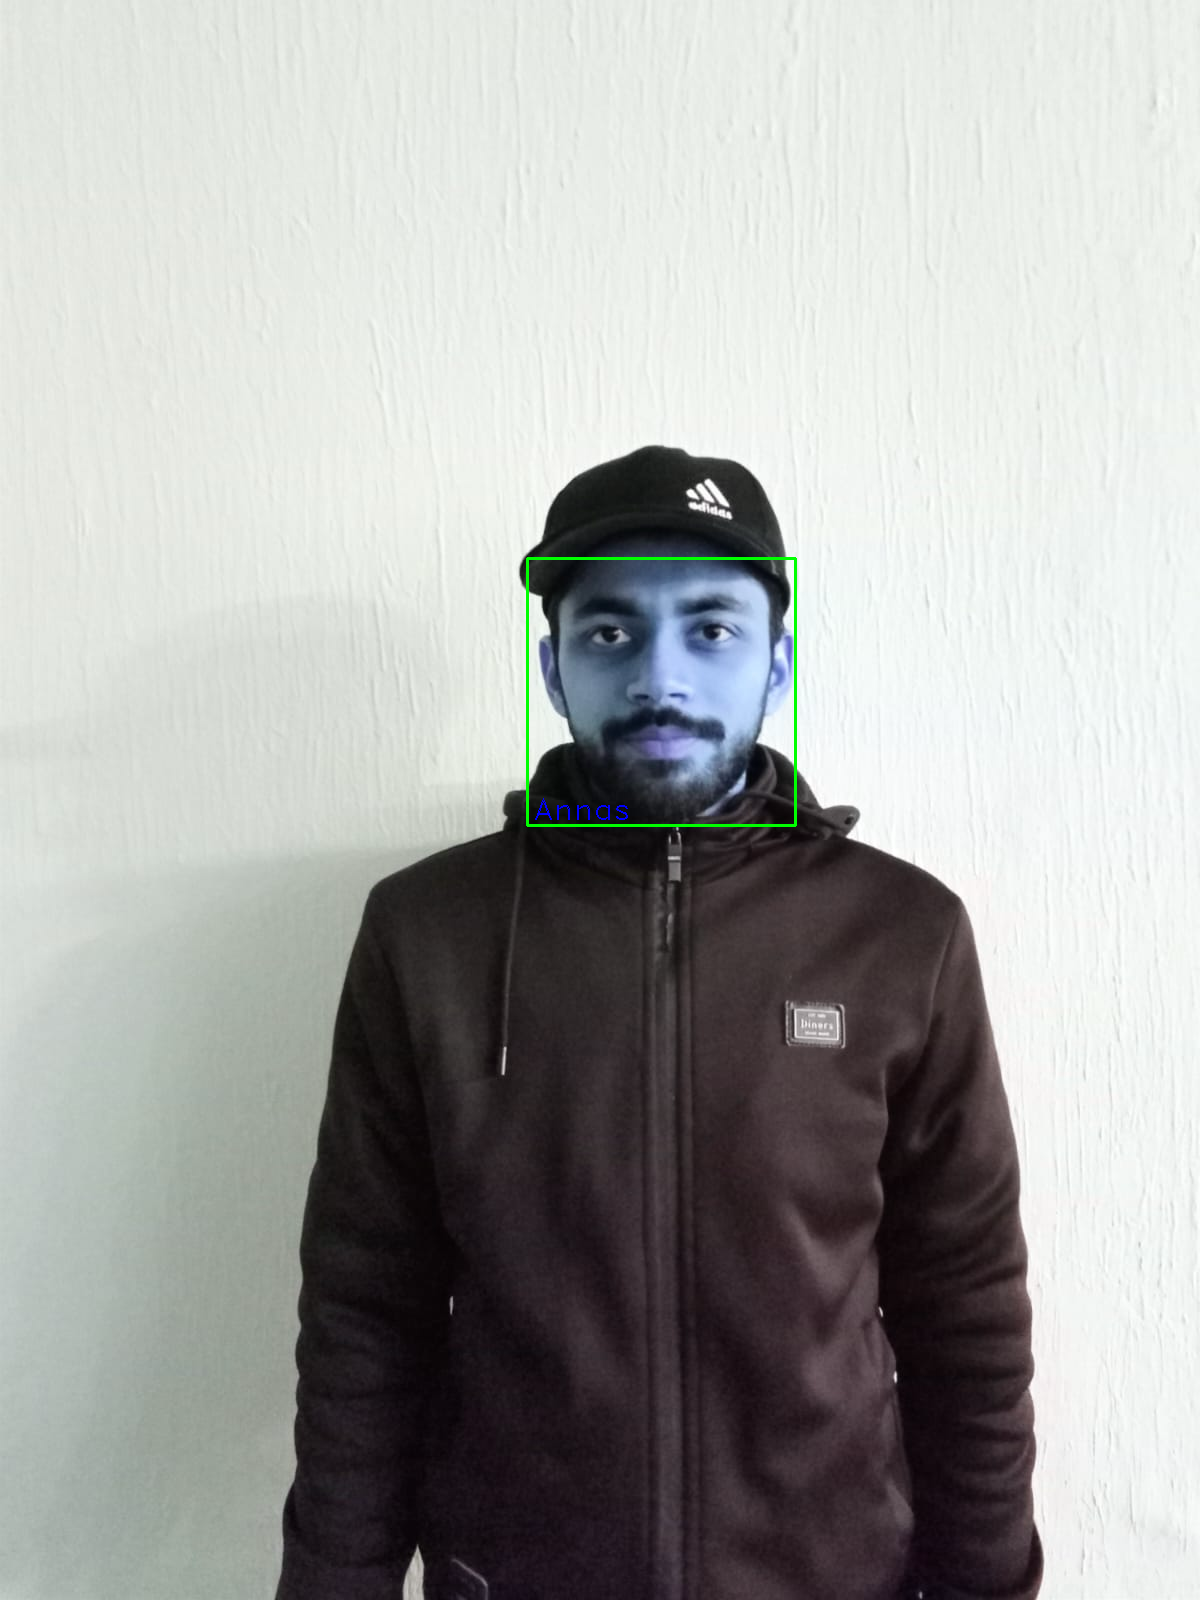

In [ ]:
# Function to recognize faces in an image
def recognize_faces(image_path, model_path):
    # Load the trained model
    with open(model_path, 'rb') as model_file:
        knn_clf = pickle.load(model_file)

    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    for face_location, face_encoding in zip(face_locations, face_encodings):
        # Use knn_clf.predict instead of knn_clf.predict_proba
        name = knn_clf.predict([face_encoding])[0]

        # Draw a box around the face
        top, right, bottom, left = face_location
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

        # Draw the name on the image
        font = cv2.FONT_HERSHEY_DUPLEX
        fontScale = 1.0  # Adjust this value to increase or decrease the font size
        fontColor = (255, 0, 0)  # BGR color format, (0, 0, 255) for red, (0, 255, 0) for green, etc.
        cv2.putText(image, name, (left + 6, bottom - 6), font, fontScale, fontColor, 1)

    # Display the image using cv2_imshow
    cv2_imshow(image)


# Test the face recognition on an unseen image
model_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/models/Model1/face_recognition_model.pkl'
test_image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/stdImages/Annas/f.jpeg'
recognize_faces(test_image_path, model_path)


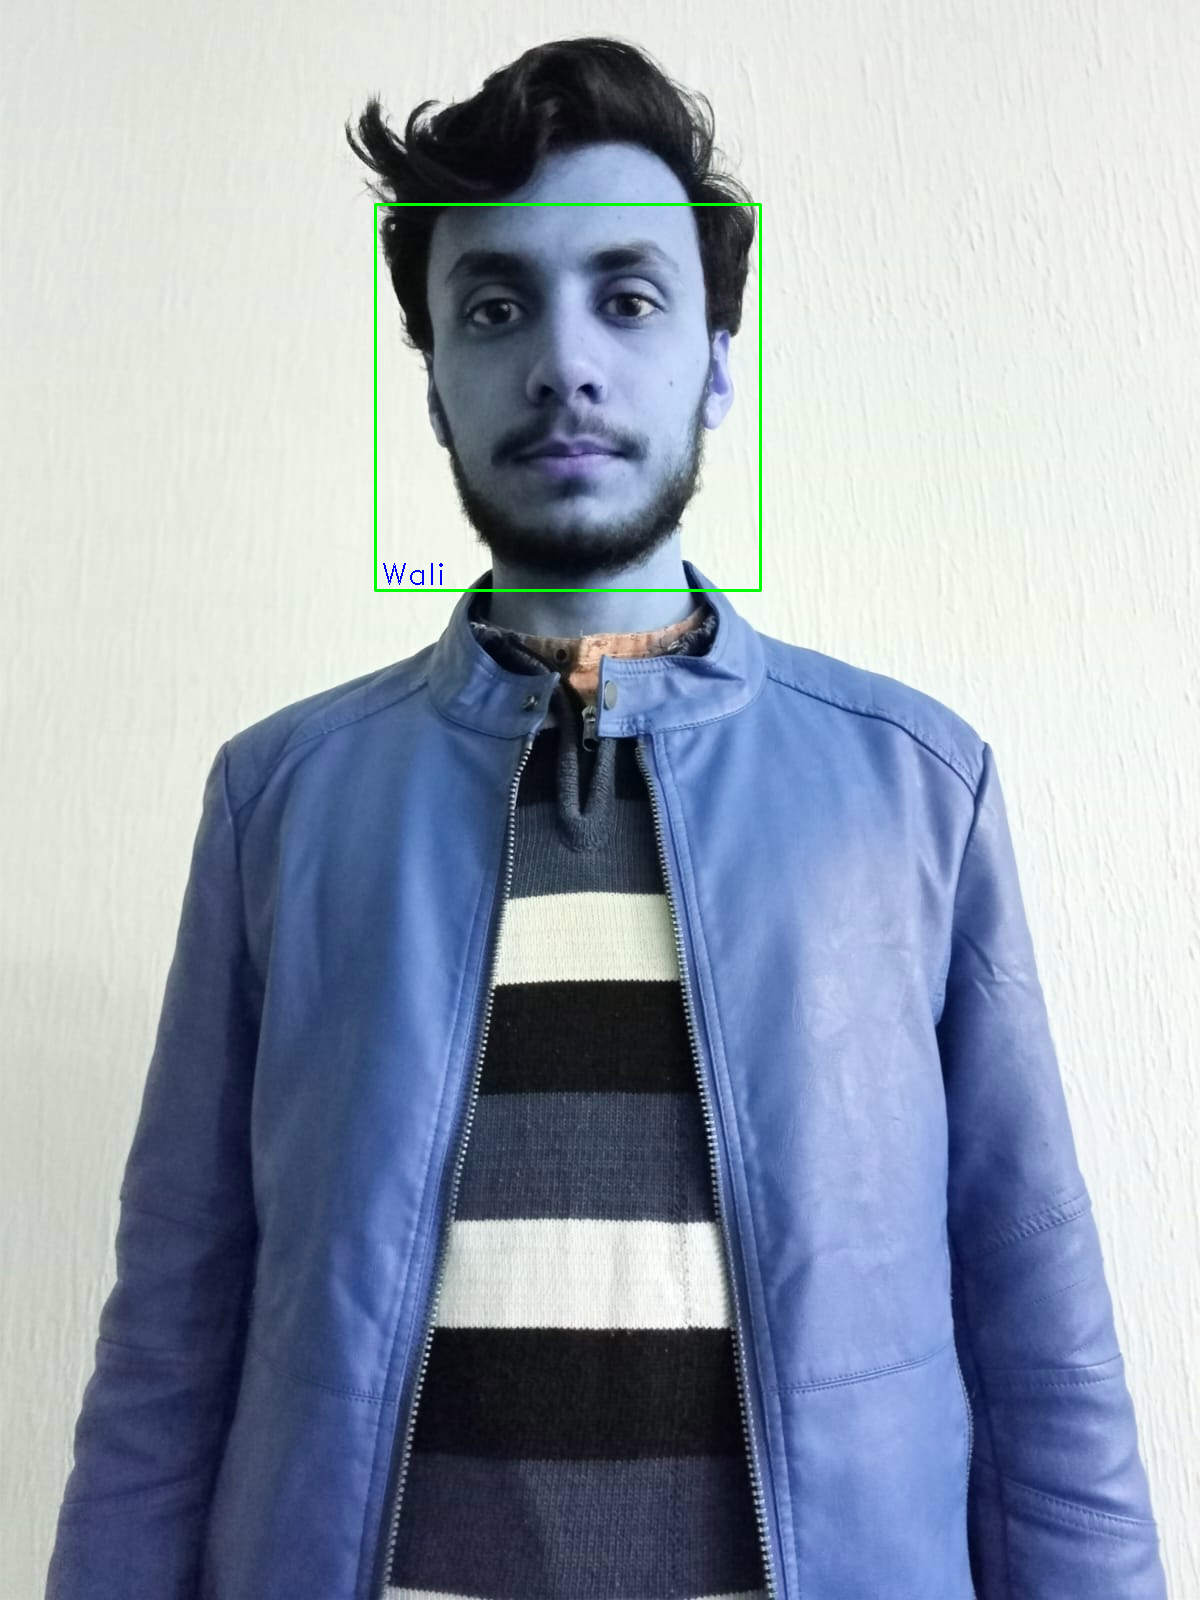

In [ ]:
test_image_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/stdImages/Wali/f.jpeg'
recognize_faces(test_image_path, model_path)

# For Video

In [ ]:
# Function to recognize faces in a video
def recognize_faces_in_video(video_path, model_path):
    # Load the trained model
    with open(model_path, 'rb') as model_file:
        knn_clf = pickle.load(model_file)

    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    while video_capture.isOpened():
        # Read a single frame from the video
        ret, frame = video_capture.read()

        if not ret:
            break

        # Find all face locations in the current frame
        face_locations = face_recognition.face_locations(frame)
        face_encodings = face_recognition.face_encodings(frame, face_locations)

        for face_location, face_encoding in zip(face_locations, face_encodings):
            # Predict the student name
            name = knn_clf.predict([face_encoding])[0]

            # Draw a box around the face
            top, right, bottom, left = face_location
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

            # Draw the name on the image with larger font size and a different color
            font = cv2.FONT_HERSHEY_DUPLEX
            fontScale = 1.0
            fontColor = (255, 0, 0)  # Blue color
            cv2.putText(frame, name, (left + 6, bottom - 6), font, fontScale, fontColor, 1)

        # Display the resulting frame
        cv2_imshow(frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object
    video_capture.release()
    cv2.destroyAllWindows()


# Test the face recognition on a video
model_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/models/Model1/face_recognition_model.pkl'
video_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/video/Annas Shahab.mp4'  # Replace with the path to your video file
recognize_faces_in_video(video_path, model_path)

In [ ]:
# Function to recognize faces in webcam feed
def recognize_faces_in_webcam(model_path):
    # Load the trained model
    with open(model_path, 'rb') as model_file:
        knn_clf = pickle.load(model_file)

    # Open the webcam
    video_capture = cv2.VideoCapture(0)


    while True:
        # Read a single frame from the webcam
        ret, frame = video_capture.read()

        # Check if the frame was successfully captured
        if not ret:
            print("Error: Unable to capture frame from the webcam.")
            break

        # Find all face locations in the current frame
        face_locations = face_recognition.face_locations(frame)
        face_encodings = face_recognition.face_encodings(frame, face_locations)

        for face_location, face_encoding in zip(face_locations, face_encodings):
            # Predict the student name
            name = knn_clf.predict([face_encoding])[0]

            # Draw a box around the face
            top, right, bottom, left = face_location
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

            # Draw the name on the image with larger font size and a different color
            font = cv2.FONT_HERSHEY_DUPLEX
            fontScale = 1.0
            fontColor = (255, 0, 0)  # Blue color
            cv2.putText(frame, name, (left + 6, bottom - 6), font, fontScale, fontColor, 1)


        # Display the resulting frame
        cv2_imshow(frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam
    video_capture.release()
    cv2.destroyAllWindows()


# Test the face recognition on the webcam feed
model_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/models/Model1/face_recognition_model.pkl'
recognize_faces_in_webcam(model_path)

Error: Unable to capture frame from the webcam.


Webcam is accessible: False


In [ ]:
# Function to recognize faces in webcam feed
def recognize_faces_in_webcam(model_path):
    # Load the trained model
    with open(model_path, 'rb') as model_file:
        knn_clf = pickle.load(model_file)

while not video_capture.isOpened():
      print("Waiting for the webcam to be opened...")
      time.sleep(1)

print("Webcam opened. Starting face recognition.")

while True:
    # Read a single frame from the webcam
    ret, frame = video_capture.read()

    # Check if the frame was successfully captured
    if not ret:
        print("Error: Unable to capture frame from the webcam.")
        break

    # Find all face locations in the current frame
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    for face_location, face_encoding in zip(face_locations, face_encodings):
        # Predict the student name
        name = knn_clf.predict([face_encoding])[0]

        # Draw a box around the face
        top, right, bottom, left = face_location
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

        # Draw the name on the image with larger font size and a different color
        font = cv2.FONT_HERSHEY_DUPLEX
        fontScale = 1.0
        fontColor = (255, 0, 0)  # Blue color
        cv2.putText(frame, name, (left + 6, bottom - 6), font, fontScale, fontColor, 1)

    # Display the resulting frame
    cv2_imshow(frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
video_capture.release()
cv2.destroyAllWindows()



# Test the face recognition on the webcam feed
model_path = '/content/drive/MyDrive/ColabNotebooks/Projects/0. Facial Recognition/models/Model1/face_recognition_model.pkl'
recognize_faces_in_webcam(model_path)

Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to be opened...
Waiting for the webcam to

KeyboardInterrupt: 